In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [149]:
FIN_PATH = "/home/peter/Documents/uni/FIN-Dataset"
scene = "conferenceRoom"

In [180]:
def gather_dfs(scene: str):
    root = os.path.join(FIN_PATH, scene)
    qual_data = dict()
    sim_data = dict()
    for subdir in os.listdir(root):
        if not os.path.isdir(os.path.join(root, subdir)) or subdir == "GT":
            continue
        metrics_path = os.path.join(FIN_PATH, scene, subdir, "metrics", f"{subdir}-{scene}.csv")
        sim_path = os.path.join(FIN_PATH, scene, subdir, "metrics", f"{subdir}-{scene}-sim.csv")
        metrics = pd.read_csv(metrics_path)
        sim = pd.read_csv(sim_path)
        sim["Cloud Size"] = metrics["num_points"]
        metrics["Symmetric Similarity"] = sim["Symmetric Similarity"]
        qual_data[subdir] = metrics
        sim_data[subdir] = sim
    return qual_data, sim_data

In [159]:
qual_data, sim_data = gather_dfs(scene)
sim_data

,Filename,Symmetric Similarity,Cloud Size
0,office-T0,0.998217,8328
1,office-T1,0.999005,23427
2,office-T10,0.998466,30933
3,office-T100,0.997439,40257
4,office-T101,0.997436,47427
...,...,...,...
114,office-T95,0.997448,1082778
115,office-T96,0.997452,1085112
116,office-T97,0.997448,1087941
117,office-T98,0.997444,1091295


In [53]:
files =  [file.split("-")[0][1:] for file in os.listdir(os.path.join(FIN_PATH, scene)) if os.path.isfile(os.path.join(FIN_PATH, scene, file)) and file.endswith(".ply")]
num_clouds = max(map(int, files))+1
x = np.arange(num_clouds)
len(x)

131

In [181]:
def gather_all():
    qual_data = dict()
    sims_data = dict()
    for scene in os.listdir(FIN_PATH):
        qual_data[scene], sims_data[scene] = gather_dfs(scene)
    return qual_data, sims_data
        

scene_qual_data, scene_sim_data = gather_all()


In [182]:
scene_sim_data

{'office': {'draco':         Filename  Symmetric Similarity  Cloud Size
  0      office-T0              0.985275        8328
  1      office-T1              0.979285       23427
  2     office-T10              0.946411       30933
  3    office-T100              0.910516       40257
  4    office-T101              0.910430       47427
  ..           ...                   ...         ...
  114   office-T95              0.910842     1082778
  115   office-T96              0.910942     1085112
  116   office-T97              0.910792     1087941
  117   office-T98              0.910675     1091295
  118   office-T99              0.910572     1092495
  
  [119 rows x 3 columns],
  'tmc3':         Filename  Symmetric Similarity  Cloud Size
  0      office-T0              0.926969        8328
  1      office-T1              0.912345       23427
  2     office-T10              0.894185       30933
  3    office-T100              0.876076       40257
  4    office-T101              0.875892   

In [183]:
algo_all = dict()
for scene in os.listdir(FIN_PATH):
    for algo, df in scene_qual_data[scene].items():
        if not algo in algo_all:
            algo_all[algo] = df
        else:
            algo_all[algo] = pd.concat([algo_all[algo],df])

680
680
680


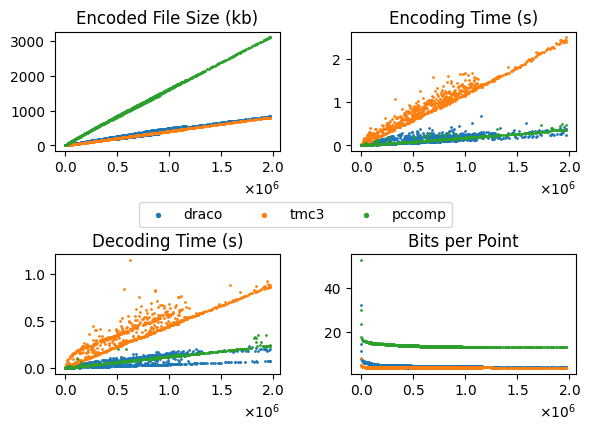

In [ ]:
fig, axs = plt.subplots(2,2)
ls = []
import matplotlib.ticker as mtick
algorithms = []
for algorithm, df in algo_all.items():
    algorithms.append(algorithm)
    bpps = df["bpp"]
    enc_size = df["enc_file_size_bits"]/8000
    time_enc = df["time_enc_ns"]/10**9
    time_dec = df["time_dec_ns"]/10**9
    points = df["num_points"]
    l = axs[0, 0].scatter(points, enc_size, s=1)
    ls.append(l)
    axs[0, 0].set_title("Encoded File Size (kb)")
    axs[0, 1].scatter(points, time_enc, s=1)
    axs[0, 1].set_title("Encoding Time (s)")
    axs[1, 0].scatter(points, time_dec, s=1)
    axs[1, 0].set_title("Decoding Time (s)")
    axs[1, 1].scatter(points, bpps, s=1, label=algorithm)
    axs[1, 1].set_title("Bits per Point")
for ax in axs:
    for axx in ax:
        axx.xaxis.set_major_formatter(mtick.ScalarFormatter(useMathText=True))
lgnd = fig.legend(ls, algorithms, loc="center", ncols=(3))
for handle in lgnd.legend_handles:
    handle.set_sizes([8.0])
fig.tight_layout(pad=2.5)
plt.show()

0 office
draco         Filename  Symmetric Similarity  Cloud Size
0      office-T0              0.985275        8328
1      office-T1              0.979285       23427
2     office-T10              0.946411       30933
3    office-T100              0.910516       40257
4    office-T101              0.910430       47427
..           ...                   ...         ...
114   office-T95              0.910842     1082778
115   office-T96              0.910942     1085112
116   office-T97              0.910792     1087941
117   office-T98              0.910675     1091295
118   office-T99              0.910572     1092495

[119 rows x 3 columns]
tmc3         Filename  Symmetric Similarity  Cloud Size
0      office-T0              0.926969        8328
1      office-T1              0.912345       23427
2     office-T10              0.894185       30933
3    office-T100              0.876076       40257
4    office-T101              0.875892       47427
..           ...                   ...

/tmp/ipykernel_6204/964027901.py:20: UserWarning: The figure layout has changed to tight
  fig.tight_layout(pad=2.5)


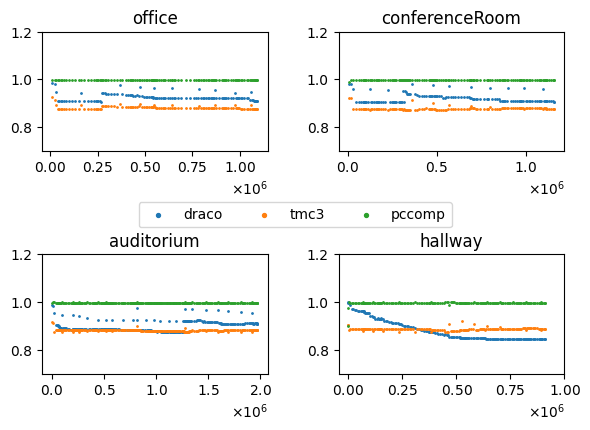

In [ ]:
fig, axs = plt.subplots(2, 2, constrained_layout = True)
scenes = list(os.listdir(FIN_PATH))
ls = []
for i, scene in enumerate(scenes):
    for algo, df in scene_sim_data[scene].items():
        similarity = df["Symmetric Similarity"]    
        cloud_size = df["Cloud Size"]
        l = axs.flat[i].scatter(cloud_size, similarity, s=1, label="draco")
        ls.append(l)
        axs.flat[i].set_ylim([0.7, 1.2])
        if scene == "hallway":
            axs.flat[i].set_xticks([0.0, 0.25*10**6, 0.5*10**6, 0.75*10**6, 1.0*10**6])
        axs.flat[i].xaxis.set_major_formatter(mtick.ScalarFormatter(useMathText=True))
        axs.flat[i].set_title(scene)
lgnd = fig.legend(ls, algorithms, loc="center", ncols=(3))
for handle in lgnd.legend_handles:
    handle.set_sizes([8.0])
fig.tight_layout(pad=2.5)

plt.show()

In [ ]:
import open3d as o3d
a = o3d.io.read_point_cloud("/home/peter/Documents/uni/FIN-Dataset/hallway/T159-894879.ply")
b = o3d.io.read_point_cloud("/home/peter/Documents/uni/pc-compression/SparsePCGC/output/ours_sparse/T159-894879_0-001_dec.ply")
b = b.scale(0.001, center=b.get_center())
bb = b.get_center()
aa = a.get_center()
b = b.translate(aa-bb)
# c = o3d.io.read_point_cloud("/home/peter/Documents/uni/FIN-Dataset/hallway/scaled/T159-894879.ply")


In [58]:
o3d.visualization.draw_geometries([a, b])

In [ ]:

o3d.visualization.draw_geometries([hw_scaled_in, hw_scaled_out, hw_scaled_out_copy])

In [33]:
def draw_bb(a, b,c ):
    hw_scaled_in_bb = a.get_oriented_bounding_box() 
    hw_scaled_in_bb.color = (1, 0, 0)
    hw_scaled_out_bb = b.get_oriented_bounding_box()
    hw_scaled_out_bb.color = (0,1,0)
    hw_scaled_out_copy_bb = c.get_oriented_bounding_box()
    hw_scaled_out_copy_bb.color = (0,0,1)
    o3d.visualization.draw_geometries([hw_scaled_in_bb, hw_scaled_out_bb, hw_scaled_out_copy_bb])
draw_bb(office_scaled_in, office_scaled_out, office_scaled_out_copy)